Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of classes: 8
Class names: ['AH' 'AL' 'BH' 'BL' 'NH' 'NL' 'PH' 'PL']
Epoch 1/30
91/91 [==============================] - 80s 852ms/step - loss: 27.8529 - accuracy: 0.1791 - val_loss: 2.6895 - val_accuracy: 0.1868
Epoch 2/30
91/91 [==============================] - 80s 877ms/step - loss: 3.5546 - accuracy: 0.1873 - val_loss: 1.9117 - val_accuracy: 0.2857
Epoch 3/30
91/91 [==============================] - 77s 852ms/step - loss: 2.1505 - accuracy: 0.2121 - val_loss: 1.8644 - val_accuracy: 0.3297
Epoch 4/30
91/91 [==============================] - 82s 902ms/step - loss: 1.9534 - accuracy: 0.2755 - val_loss: 1.8172 - val_accuracy: 0.3407
Epoch 5/30
91/91 [==============================] - 94s 1s/step - loss: 1.8937 - accuracy: 0.3168 - val_loss: 1.7316 - val_accuracy: 0.3297
Epoch 6/30
91/91 [==============================] - 80s 879ms/step - loss: 1.8752 

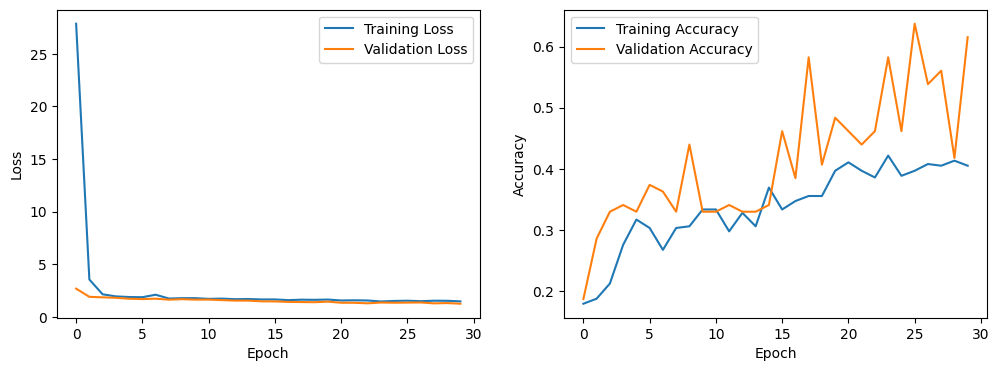

3/3 [==============================] - 9s 2s/step


ValueError: ignored

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_uniform
import tensorflow as tf
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path directories
spectrogram_path = '/content/drive/MyDrive/Adi/Spectrograms'
label_path = '/content/drive/MyDrive/Adi/file_labels.csv'

# Hyperparameters
learning_rate = 0.001
dropout_rate = 0.75
epochs = 30
batch_size = 4

# Load spectrogram data and labels
spectrograms = []
labels = []

# Read the label CSV file
label_df = pd.read_csv(label_path)

# Iterate through the label DataFrame
for index, row in label_df.iterrows():
    filename = row['File_Name']
    label = row['Label']
    filename = os.path.splitext(filename)[0] + '.png'  # Change file extension to .png

    image_path = os.path.join(spectrogram_path, filename)

    # Load the spectrogram image
    spectrogram = Image.open(image_path).convert('RGB')  # Convert to RGB if necessary
    spectrograms.append(np.array(spectrogram))
    labels.append(label)

# Convert the lists to NumPy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

print("Number of classes:", num_classes)
print("Class names:", class_names)

# Convert labels to categorical
labels_categorical = to_categorical(labels_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms, labels_categorical, test_size=0.2, random_state=42
)

# Define the RiftNet architecture
def RiftNet(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    # Add more layers to the RiftNet architecture as needed
    # ...
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer=glorot_uniform()))
    return model

# Create the RiftNet model
input_shape = X_train[0].shape
model = RiftNet(input_shape, num_classes)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Plot and save training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('/content/drive/MyDrive/Adi/training_curvess_1.png')
plt.show()

# Extract features using the RiftNet model
X_test_features = model.predict(X_test)

# Reshape the features for t-SNE
num_samples, height, width, channels = X_test_features.shape
X_test_reshaped = np.reshape(X_test_features, (num_samples, height * width * channels))

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test_reshaped)

# Plot and save t-SNE embeddings
plt.figure(figsize=(8, 6))
for class_index in range(num_classes):
    indices = np.where(y_test.argmax(axis=1) == class_index)
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=class_names[class_index])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.savefig('/content/drive/MyDrive/Adi/tsne_embeddingss_1.png')
plt.show()

# Save the model
model.save('/content/drive/MyDrive/Adi/riftnet_model_1.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of classes: 8
Class names: ['AH' 'AL' 'BH' 'BL' 'NH' 'NL' 'PH' 'PL']
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/30
91/91 [==============================] - 1366s 15s/step - loss: 1.5539 - accuracy: 0.4050 - val_loss: 25.4046 - val_accuracy: 0.4725
Epoch 2/30
91/91 [==============================] - 1339s 15s/step - loss: 1.0597 - accuracy: 0.6336 - val_loss: 4.2706 - val_accuracy: 0.5495
Epoch 3/30
91/91 [==============================] - 1330s 15s/step - loss: 0.8734 - accuracy: 0.6997 - val_loss: 3.0808 - val_accuracy: 0.5824
Epoch 4/30
91/91 [==============================] - 1336s 15s/step - loss: 0.4985 - accuracy: 0.8209 - val_loss: 17.5755 - val_accuracy: 0.3077
Epoch 5/30
91/91 [==============================] - 1336s 15s/step - loss: 0.3459 - accuracy: 0.9118 - val_loss: 0.1007 - val_accuracy: 0.9670
Epoch 6/30
91

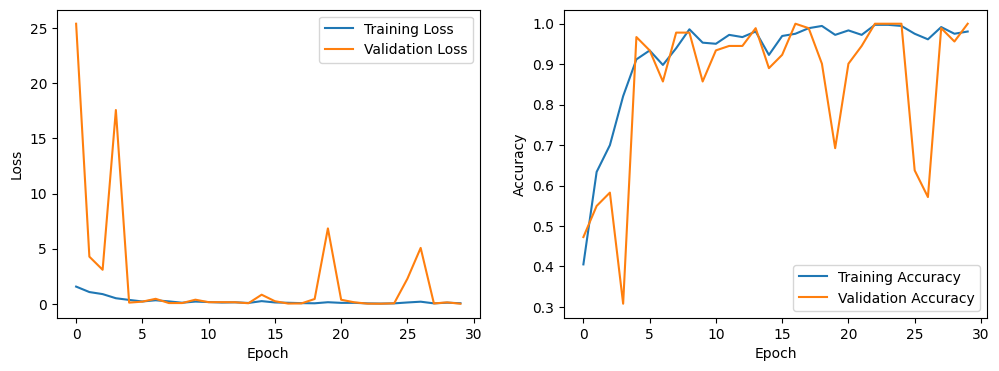

3/3 [==============================] - 79s 25s/step


ValueError: ignored

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import glorot_uniform
import tensorflow as tf
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path directories
spectrogram_path = '/content/drive/MyDrive/Adi/Spectrograms'
label_path = '/content/drive/MyDrive/Adi/file_labels.csv'

# Hyperparameters
learning_rate = 0.001
dropout_rate = 0.75
epochs = 30
batch_size = 4

# Load spectrogram data and labels
spectrograms = []
labels = []

# Read the label CSV file
label_df = pd.read_csv(label_path)

# Iterate through the label DataFrame
for index, row in label_df.iterrows():
    filename = row['File_Name']
    label = row['Label']
    filename = os.path.splitext(filename)[0] + '.png'  # Change file extension to .png

    image_path = os.path.join(spectrogram_path, filename)

    # Load the spectrogram image
    spectrogram = Image.open(image_path).convert('RGB')  # Convert to RGB if necessary
    spectrograms.append(np.array(spectrogram))
    labels.append(label)

# Convert the lists to NumPy arrays
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

print("Number of classes:", num_classes)
print("Class names:", class_names)

# Convert labels to categorical
labels_categorical = to_categorical(labels_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    spectrograms, labels_categorical, test_size=0.2, random_state=42
)

# Define the Xception-based model
def create_xception_model(input_shape, num_classes):
    base_model = Xception(include_top=False, weights='imagenet', input_shape=input_shape)

    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax', kernel_initializer=glorot_uniform()))
    return model

# Create the Xception model
input_shape = X_train[0].shape
model = create_xception_model(input_shape, num_classes)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Plot and save training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('/content/drive/MyDrive/Adi/training_curvess_2.png')
plt.show()

# Extract features using the Xception model
X_test_features = model.predict(X_test)

# Reshape the features for t-SNE
num_samples, height, width, channels = X_test_features.shape
X_test_reshaped = np.reshape(X_test_features, (num_samples, height * width * channels))

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test_reshaped)

# Plot and save t-SNE embeddings
plt.figure(figsize=(8, 6))
for class_index in range(num_classes):
    indices = np.where(y_test.argmax(axis=1) == class_index)
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=class_names[class_index])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.savefig('/content/drive/MyDrive/Adi/tsne_embeddingss_2.png')
plt.show()

# Save the model
model.save('/content/drive/MyDrive/Adi/xception_model_2.h5')


3/3 [==============================] - 82s 26s/step


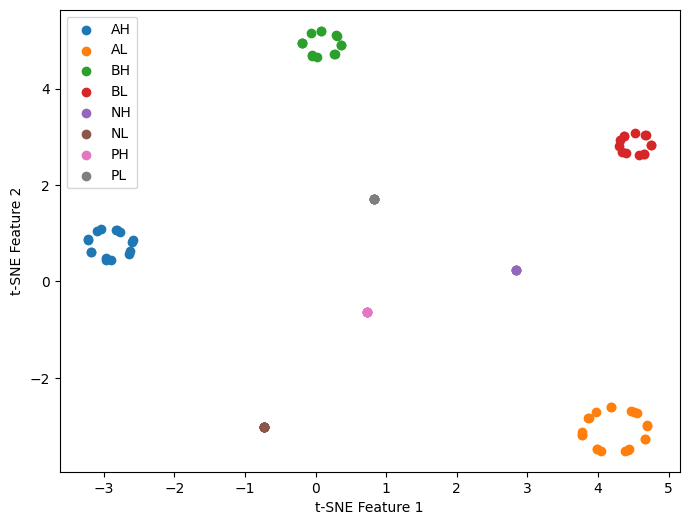

In [6]:
# Extract features using the Xception model
X_test_features = model.predict(X_test)

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test_features)

# Plot and save t-SNE embeddings
plt.figure(figsize=(8, 6))
for class_index in range(8):
    indices = np.where(y_test.argmax(axis=1) == class_index)
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=class_names[class_index])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.savefig('/content/drive/MyDrive/Adi/tsne_embeddingss_2.png')
plt.show()



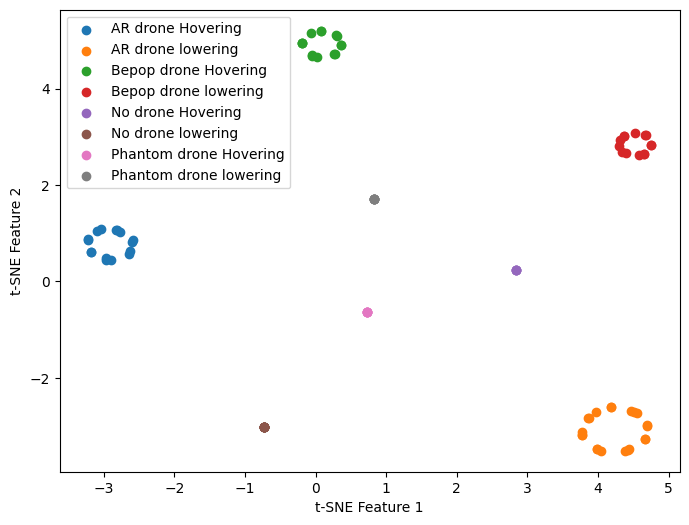

In [7]:
# Update the class labels
class_names = [
    'AR drone Hovering',
    'AR drone lowering',
    'Bepop drone Hovering',
    'Bepop drone lowering',
    'No drone Hovering',
    'No drone lowering',
    'Phantom drone Hovering',
    'Phantom drone lowering'
]

# ...

# Plot and save t-SNE embeddings
plt.figure(figsize=(8, 6))
for class_index in range(8):
    indices = np.where(y_test.argmax(axis=1) == class_index)
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=class_names[class_index])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.savefig('/content/drive/MyDrive/Adi/tsne_embeddings_3.png')
plt.show()


In [9]:
from PIL import Image
import numpy as np

# Load and preprocess the random spectrogram image
random_spectrogram_path = '/content/drive/MyDrive/nandu/test_spectrogram/AR_drone_RF Data_10100_L_10100L_6.png'
random_spectrogram = Image.open(random_spectrogram_path).convert('RGB')
random_spectrogram = random_spectrogram.resize((input_shape[0], input_shape[1]))  # Resize the image
random_spectrogram = np.array(random_spectrogram)  # Convert to numpy array
random_spectrogram = random_spectrogram / 255.0  # Normalize the image

# Reshape the spectrogram to match the model's input shape
random_spectrogram = np.reshape(random_spectrogram, (1, *input_shape))

# Make prediction on the random spectrogram
prediction = model.predict(random_spectrogram)

# Determine the predicted class
predicted_class_index = np.argmax(prediction)
predicted_class_label = class_names[predicted_class_index]

print('Predicted Class:', predicted_class_label)



1/1 [==============================] - 2s 2s/step
Predicted Class: AR drone lowering


In [10]:
# Save the model
model.save('/content/drive/MyDrive/nandu/saved_xception_modal/xception_saved.h5')
